In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import plotting
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import precision_score, plot_confusion_matrix


In [171]:
from seaborn import load_dataset
penguins = load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [172]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


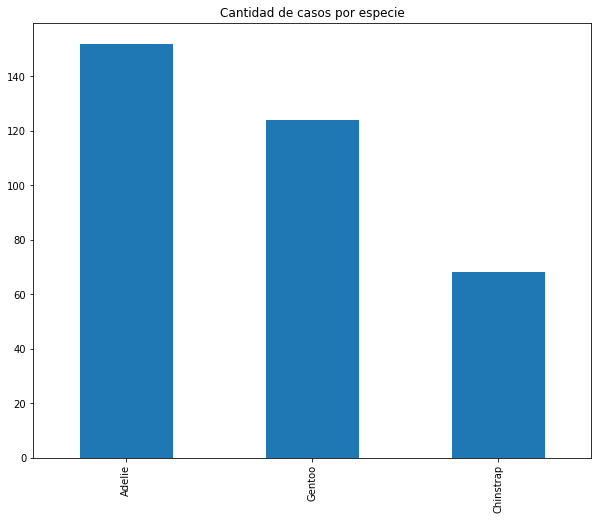

In [173]:
plt.figure(figsize = (10, 8))
penguins.species.value_counts().plot(kind='bar')
plt.title("Cantidad de casos por especie")
plt.show()


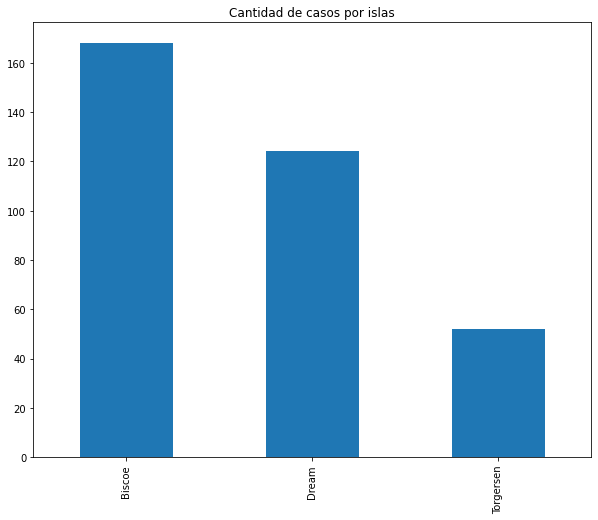

In [174]:
plt.figure(figsize = (10, 8))
penguins.island.value_counts().plot(kind='bar')
plt.title("Cantidad de casos por islas")
plt.show()

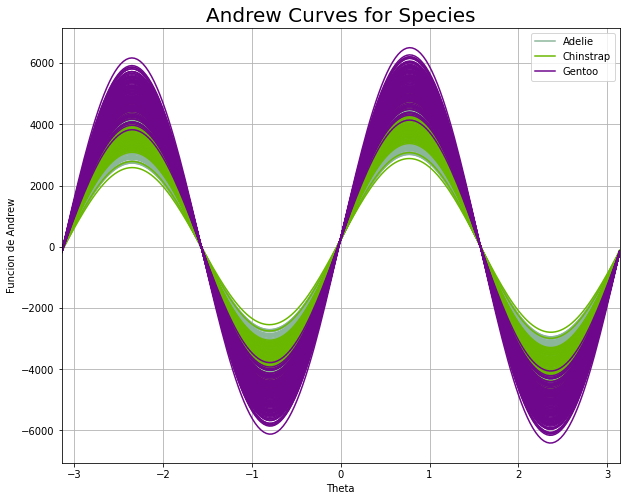

In [175]:
plt.rcParams['figure.figsize'] = (10, 8)
plotting.andrews_curves(penguins.drop(columns=["island","sex"],axis=1), "species")
plt.title('Andrew Curves for Species', fontsize = 20)
plt.xlabel("Theta")
plt.ylabel('Funcion de Andrew')
plt.show(); 

In [176]:
data=penguins
data=data.dropna()
data["sex"] = np.where(data["sex"] == "Female", 0, 1)


C:\Users\diego\AppData\Local\Temp/ipykernel_19424/727753799.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["sex"] = np.where(data["sex"] == "Female", 0, 1)


In [177]:
# Variables predictoras
TARGET='species'
X = data.loc[:, data.columns != TARGET]
# Variable objetivo
y = data[TARGET].values 
one_hot_cols = [
    'island', 
]
transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore') ,one_hot_cols),
    remainder='passthrough'  # Esto signifca que las cols que no esten en lista, las deja como tal
)
transformed = transformer.fit_transform(X)
transformed_df = pd.DataFrame(
    transformed,
    columns=transformer.get_feature_names_out()
)
transformed_df.head() #dataframe de datos listos para hacer el split


,onehotencoder__island_Biscoe,onehotencoder__island_Dream,onehotencoder__island_Torgersen,remainder__bill_length_mm,remainder__bill_depth_mm,remainder__flipper_length_mm,remainder__body_mass_g,remainder__sex
0,0.0,0.0,1.0,39.1,18.7,181.0,3750.0,1.0
1,0.0,0.0,1.0,39.5,17.4,186.0,3800.0,0.0
2,0.0,0.0,1.0,40.3,18.0,195.0,3250.0,0.0
3,0.0,0.0,1.0,36.7,19.3,193.0,3450.0,0.0
4,0.0,0.0,1.0,39.3,20.6,190.0,3650.0,1.0


In [178]:
X_train, X_test, y_train, y_test = train_test_split(transformed_df, y, test_size=0.3,random_state=10)


In [179]:
#Funcion que toma como entradas los datos de entrenamiento y de test para hacer el FIT y graficar respectivamente la matriz de confusion
def run_experiment(X_train, y_train, X_test, y_test, clf):
    clf.fit(X_train, y_train)
    
    # training confusion matrix
    y_pred = clf.predict(X_train)
    cm = confusion_matrix(y_train, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    print("Accuracy Train: ", accuracy_score(y_train, y_pred))
    
    # test confusion matrix
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    print("Accuracy Test: ", accuracy_score(y_test, y_pred))
    return disp


Accuracy Train:  1.0
Accuracy Test:  1.0


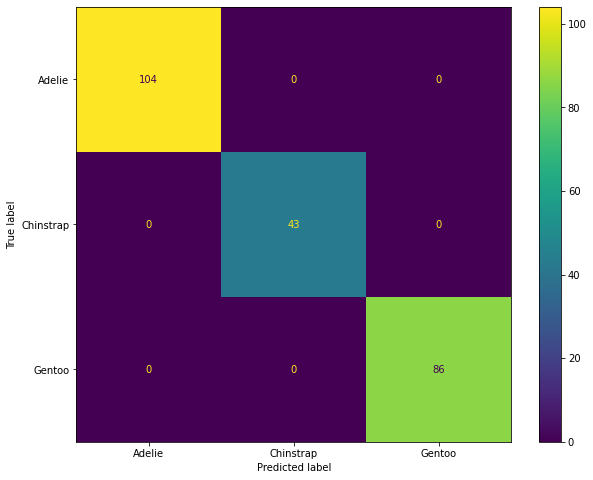

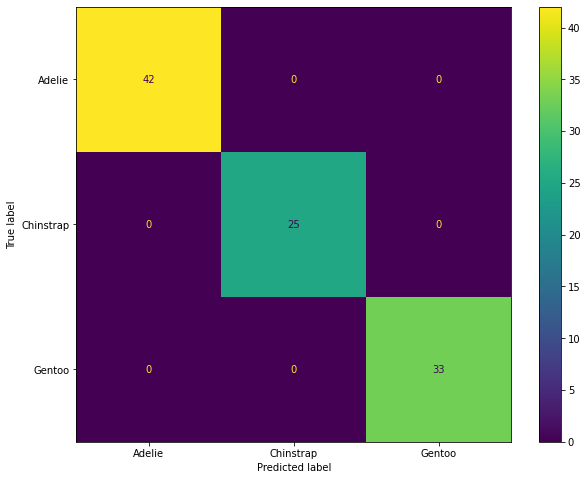

In [180]:
rf_clf = RandomForestClassifier()
run_experiment(X_train, y_train, X_test, y_test, rf_clf)